# Illustration of the ~2/3 bootstrap sampling rule

Estimated fraction of unique elements in a bootstrap sample: 0.6362


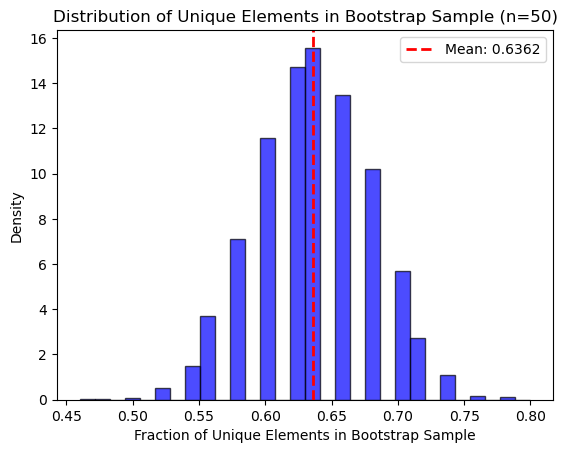

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to estimate the proportion of unique elements in a bootstrap sample
# if we bootstrap we want to know what fraction of the dataset is unique
# do a number of simulations (n)
def bootstrap_unique_fraction (n, num_simulations=10000):
    unique_fractions = []
    
    for _ in range(num_simulations):
        original_data = np.arange(n) 
        # randomly craete sample size n with replacement
        sample = np.random.choice(original_data, size = n, replace = True) 
        # count number of unique values in our sample
        unique_count = len(set(sample))
        # get the proportion of original data points and unique from samplel, get a list
        unique_fractions.append(unique_count/n)
        
    return np.mean(unique_fractions), unique_fractions
    
# Run simulation
n = 50

mean_unique_fraction, unique_fractions = bootstrap_unique_fraction(n)

# Print the estimated fraction of unique elements
print(f"Estimated fraction of unique elements in a bootstrap sample: {mean_unique_fraction:.4f}")

# Plot the distribution of unique element fractions
plt.hist(unique_fractions, bins=30, density=True, alpha=0.7, color='b', edgecolor='black')
plt.axvline(mean_unique_fraction, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {mean_unique_fraction:.4f}")
plt.xlabel("Fraction of Unique Elements in Bootstrap Sample")
plt.ylabel("Density")
plt.title(f"Distribution of Unique Elements in Bootstrap Sample (n={n})")
plt.legend()
plt.show()


# Decision tree vs. bagging on synthetic "moon" data

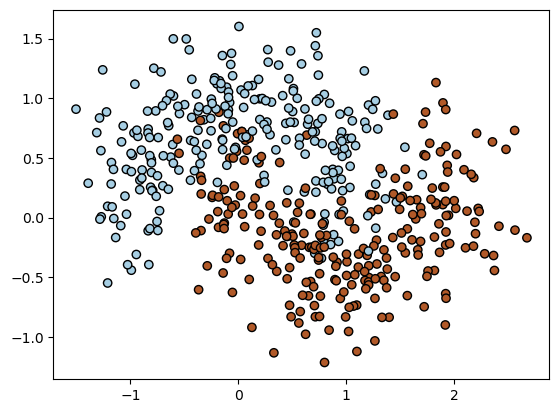

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

# Generate a toy dataset
X, y = make_moons(n_samples = 500, noise = 0.3, random_state=808)
plt.scatter(X[:,0],X[:,1],c = y, cmap=plt.cm.Paired, edgecolor ='k')

In [25]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=808)

# Train a Single Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)

# Train a Bagging Ensemble of Decision Trees
bagging = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    # number of trees (not depth) with unique dataset
    n_estimators = 50,
    # for each tree put it on a bootstrap branch of the data
    bootstrap= True,
    random_state=808)

bagging.fit(X_train, y_train)
bagging_preds = bagging.predict(X_test)

# Compare Accuracy
print(f"Deecision Tree Accuracy: {accuracy_score(y_test, tree_preds):.3f}")
print(f"Bagging Accuracy: {accuracy_score(y_test, bagging_preds):.3f}")

Deecision Tree Accuracy: 0.860
Bagging Accuracy: 0.887
